# 2.1)Spectral Graph Analysis of the Digital Reconstruction of the Brain (PART 2)

In this notebook spectral graph theory techniques are used to explore the weighted connectivity matrix of the microcircuit.
Improved clustering results replacing the unweighted matrix with the weighted matrix are showed.

We will follow the same steps as in notebook 2 for the weighted connectivity matrix:

- we will compute the Laplacian of the weighted connectivity matrix.
- we will check if the Fiedler vector can separate neurons in layer 6 from all other neurons as for the unweighted connectivity matrix.

In [0]:
##force not printing
%%capture 
%matplotlib inline
!pip install h5py
import numpy as np
import numpy.ma as ma
import h5py 
from scipy import sparse
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import re
import networkx as nx
import scipy as sp
import scipy.sparse as sps
from scipy.sparse import coo_matrix, hstack, vstack, csr_matrix
from sklearn.cluster import KMeans, DBSCAN,MiniBatchKMeans
import sklearn.metrics as skm


In [0]:
##read .h5 file format containing the information about the microcolumn of the averege individual. 
file_name='cons_locs_pathways_mc2_Column.h5'
h5=h5py.File(file_name,'r')

### 2.1.2) Weights with the average failure of connection

---



We upload the already computed weighted matrix (see notebook 2) where we used the average failure rate of connection: defined as ['an event when a presynaptic stimulus fails to evoke a posynaptic response'](https://bbp.epfl.ch/nmc-portal/microcircuit#/pathway/L1_HAC-L23_BTC).



[Download here the already computed weighted matrix ](https://drive.google.com/uc?export=download&id=1HLiRD93k9gq0oJbpm5IYRlhqB5j3j98O)

In [0]:
##load already computed weighted matrix
file_name='fail_weight.h5'
h5_dist=h5py.File(file_name,'r')
conn_fail=h5_dist['weight']


In [0]:
##scipy sparse matrix of conn_fail
conn_fail=csr_matrix(conn_fail)

In [0]:
N = conn_fail.shape[0]
m_values=list(h5['populations'].keys())

## 2.1) Laplacian Matrix and its spectrum 


In this section we'll compute the combinatorial and the normalized Laplacian of the weighted connectivity matrix of the microcircuit.

In [6]:
##Normal Laplacian
laplacian_norm=sp.sparse.csgraph.laplacian(conn_fail,normed=True)
##Combinatorial Laplacian
laplacian=sp.sparse.csgraph.laplacian(conn_fail,normed=False)


/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [0]:
##Compute the first 4 eigenvalues and eigenvectors of the Laplacian
evalues, evect =sp.sparse.linalg.eigsh(laplacian,k=4,which="SM")
evalues_norm, evect_norm =sp.sparse.linalg.eigsh(laplacian_norm,k=4,which="SM")


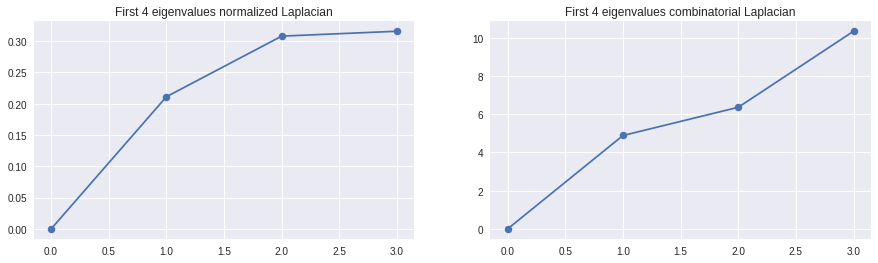

In [8]:
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
plt.title('First 4 eigenvalues normalized Laplacian')
plt.plot(evalues_norm, '.-', markersize=15)

plt.subplot(1, 2, 2)
plt.title('First 4 eigenvalues combinatorial Laplacian')
plt.plot(evalues, '.-', markersize=15);


plt.show()

## 2.2) 2D and 3D Embeddings of the Microcircuit using Laplacian eigenmaps of the weighted connectivity matrix

In [0]:
## set the coordinates for the embedding
##Normalized Laplacian
x_norm = evect_norm[:,1]
y_norm = evect_norm[:,2]
z_norm = evect_norm[:,3]
##combinatorial Laplacian
x = evect[:,1]
y = evect[:,2]
z = evect[:,3]

In [0]:
##Plot embeddings with color label
def singleplt2dembeddings(x,y,col1,colmap=None,size=0.3,title1='Embedding with normalized Laplacian eigenmaps'):
  plt.figure(figsize=(15,5))

  plt.title(title1)
  plt.scatter(x, y,c=col1,cmap=colmap, alpha=0.6,s=size)
  plt.xlabel('Eigenvector 1')
  plt.ylabel('Eigenvector 2')
  plt.colorbar()
 
def plt2dembeddings(x,y, x1,y1,col1,col2,colmap=None,size=0.3,title1='Embedding with normalized Laplacian eigenmaps',title2='Embedding with combinatorial Laplacian eigenmaps'):
  plt.figure(figsize=(18,4))
  plt.subplot(1, 2, 1)
  plt.title(title1)
  plt.scatter(x, y,c=col1,cmap=colmap, alpha=0.6,s=size)
  plt.xlabel('Eigenvector 1')
  plt.ylabel('Eigenvector 2')
  if colmap !=None:
    plt.colorbar()
  plt.subplot(1, 2, 2)
  plt.title(title2)
  #plt.axis([-0.0001,0.0001,0.00001,0.000071])
  plt.axis([-0.0000711,0.000071,-0.00008,0.000025])
  plt.xlabel('Eigenvector 1')
  plt.ylabel('Eigenvector 2')
  if colmap !=None:
    plt.colorbar()
  plt.scatter(x1, y1,c=col2, cmap=colmap, alpha=0.5,s=24)
def plt3dembeddings(col=None,colmap=None):
  fig = plt.figure(figsize=(18,4))
  ax = fig.add_subplot(121, projection='3d')
  ax.scatter(x_norm,y_norm, z_norm, s=0.5,c=col,cmap=colmap)
  ax = fig.add_subplot(122, projection='3d')
  ax.scatter(x,y, z, s=5,c=col,cmap=colmap)
  plt.axis([-0.0001,0.0001,0.00001,0.000071])
  #plt.axis([-0.0000511,-0.000011,-0.00003,0.000015])
  ax.set_zlim3d(-0.0003,0.0002)
  
  
def plthist(value,face='g'):
    plt.figure(figsize=(10,4))
    plt.hist(value, bins=50 , facecolor=face,edgecolor='black', linewidth=1.2)
    plt.show()
def twoplthist(value1,value2, face='g',tit1=' ',tit2=' '):
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    plt.hist(value1, bins=50 , facecolor=face,edgecolor='black', linewidth=1.2)
    plt.title(tit1)
    plt.subplot(1,2,2)
    plt.hist(value2, bins=50 , facecolor=face,edgecolor='black', linewidth=1.2)
    plt.title(tit2)
    plt.show()

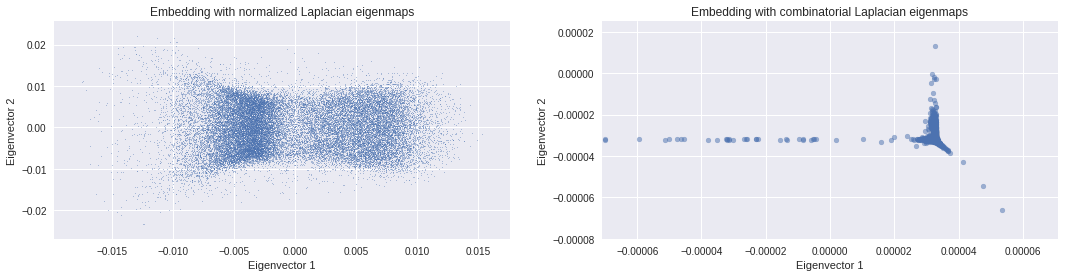

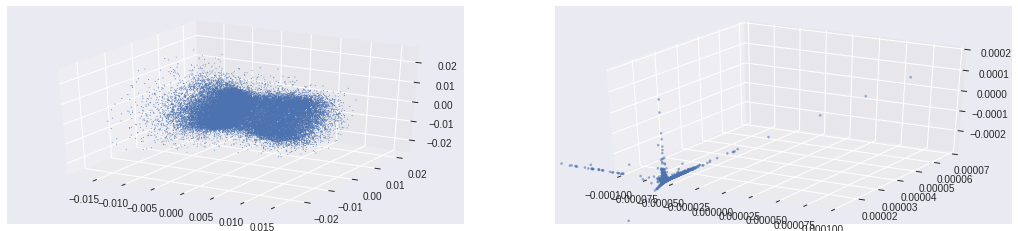

In [11]:
plt2dembeddings(x_norm,y_norm,x,y,col1=None, col2=None,colmap=None)
plt3dembeddings(col=None)

## 2.3) Spectral Clustering of the Microcircuit Network

In this section we'll focus, as in notebook 2, on finding **two clusters inside our network.**

The **clusters** will be computed in the following ways:

- using the sign of the Fiedler vector.
- using the k-mean algorithm with k=2. 

**Note** For accuracy of the k-mean algorithm we had to delete 4 points in the embedding of the combinatorial Laplacian. These ponts are located far away from the 'core' of the embedding and couldn't give us a good partition of the network with the k-mean algorithm. 

In [0]:
##Delete points too far away from the 'core' of the embedding of the combinatorial Laplacian
X=np.column_stack((x,y))
X1=np.array([w for w in X if np.abs(w[0])<0.02 and np.abs(w[1])<0.002])
x1 = X1[:,0]
y1 = X1[:,1]
##k-mean algorithm  (k=2) for the combinatorial Laplacian 
kmeans = KMeans(n_clusters=2, init='random').fit(X1)
lab=kmeans.labels_
##K-mean algorithm for the normalized Laplacian
Xnorm=np.column_stack((x_norm,y_norm))
kmeans = KMeans(n_clusters=2, init='random').fit(Xnorm)
labnorm=kmeans.labels_
#db=DBSCAN(eps=0.0005, min_samples=9000).fit(Xnorm)
#labnorm=db.labels_

In [0]:
##Function for creating labels
def labelcreate(a,val=0):
  col=[]
  for i in range(N):
    if a[i]>val:
      col.append(1)
    else:
      col.append(-1)
  return col

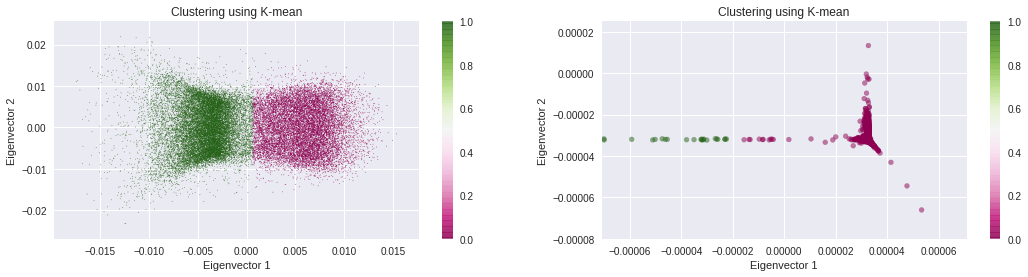

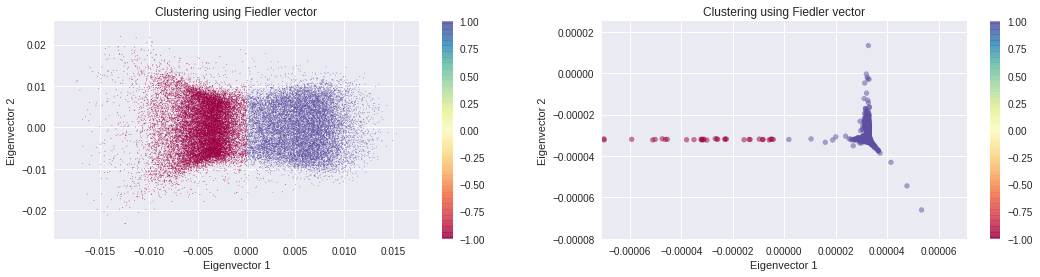

In [14]:
plt2dembeddings(x_norm,y_norm,x1,y1, col1=labnorm, col2=lab,colmap='PiYG',title1='Clustering using K-mean',title2='Clustering using K-mean')
sign=np.sign(evect_norm[:,1])
labels_norm = [sign]
labels = [np.sign(evect[:,1])]
plt2dembeddings(x_norm,y_norm,x,y, col1=labels_norm[0], col2=labels[0],colmap='Spectral',title1='Clustering using Fiedler vector',title2='Clustering using Fiedler vector')


In [15]:
for i in range(len(lab)):
  if labnorm[i]==0:
    labnorm[i]=-1
err=np.count_nonzero(labnorm - sign)
err = min(err, N - err)
print('The partition given by the K-mean algorithm and the sign of the Fiedler vector differ for {} points'.format(err))

The partition given by the K-mean algorithm and the sign of the Fiedler vector differ for 469 points


The accuracy of the correlation between the fiedler vector and the total flow is very similar to the one computed in notebook 2 and therefore is not repeated here. 

### 2.1.2) Layers based classification

In this section, as in notebook 2, we'll investigate whether the Fiedler vector can spatially separete the neurons. As space separetor we'll use the [6 layers into which the microcolumn is divided ](https://en.wikipedia.org/wiki/Cerebral_cortex). These layers divided the microcolum from the top to the bottom into 6 areas of different size, with different distribution and type of neurons.

In [0]:
## preparing layers labels
m_type=dict()
for i in range(0, len(m_values)):
        m_type[i] =m_values[i] 
num_neuron=dict()
for i in range(0, len(m_values)):
        num_neuron[i]=len(list(h5['populations'][m_type[i]]['locations']))
label_layer=[]
for i in m_type.keys():
  label_layer.extend(num_neuron[i]*list(map(int, re.findall(r'^\D*(\d+)', m_type[i]))))
label_layer = [v if v!= 23 else 2 for v in label_layer]


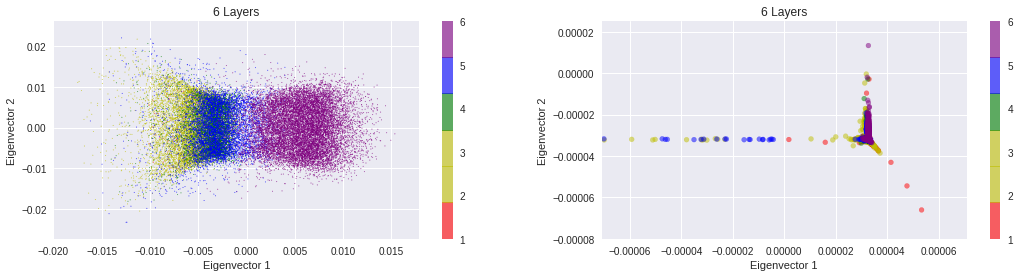

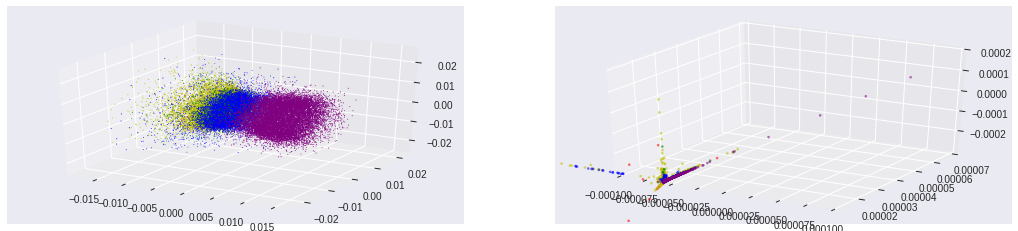

In [17]:
colors = ['r','y','y','g','b','purple']
plt2dembeddings(x_norm,y_norm,x,y, col1=label_layer, col2=label_layer,colmap=col.ListedColormap(colors),size=0.5, title1= '6 Layers', title2='6 Layers')
plt3dembeddings(col=label_layer,colmap=col.ListedColormap(colors))

Looks like the **Fiedler vector of the normalized Laplacian can distinguish neurons in layer 6 from all the other neurons and can also distinguish layer 5 and 2/3!**

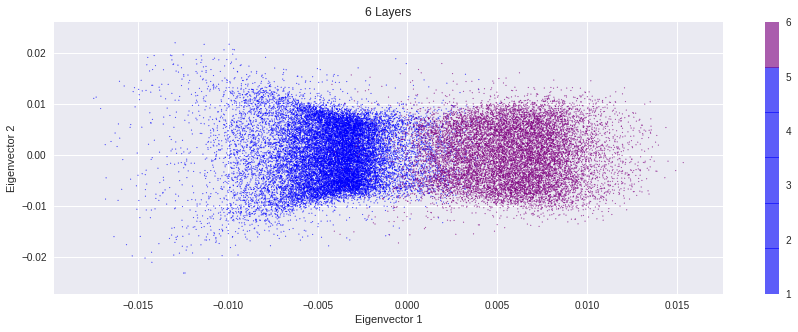

In [18]:
colors = ['b','b','b','b','b','purple']
singleplt2dembeddings(x_norm,y_norm, col1=label_layer,colmap=col.ListedColormap(colors),size=0.8, title1= '6 Layers', )

In [19]:
lab_6=labelcreate(label_layer, val=5) ##pay attention if the sign of the Fiedler vector change (this is arbitrary)
acc6= (1-float(np.count_nonzero(sign-np.array(lab_6)))/N)*100
acc6 = max(acc6,100-acc6)
print('The accuracy in using the sign of the Fiedler vector to distinguish neuron in layers 6 is {0:.2f}%'.format(acc6))

The accuracy in using the sign of the Fiedler vector to distinguish neuron in layers 6 is 96.58%


In [20]:
acc6KM= (1-float(np.count_nonzero(labnorm-np.array(lab_6)))/N)*100
acc6KM = max(acc6KM, 100- acc6KM)
print('The accuracy in using the K-mean partition to distingish neurons in layer 6 is {0:.2f}%'.format(acc6KM))


The accuracy in using the K-mean partition to distingish neurons in layer 6 is 96.92%


 ** Conclusion:** Using the sign of the Fiedler vector associated to the Laplacian of the weighted connectivity matrix gave us slightly better results than in the unweighted case. The accuracy in distinguish the 6 layer is 96.58% instead of 94.76%. 
 
Using the partition of the weighted network given by the k-mean algorithm gave us similar results as in the unweighted case: we could separate layer 6 from all the other layers with an accuracy of ~94%.
 
Moreover, one can notice that the Fiedler vector can also spatially distinguish layer 6, layer 5 and layer 3/2. Further investigation are  necessary to understand this behaviour.